In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is B4B9-3F47

 Directory of C:\Users\Vishal Vanpariya\ML Learning\Janatahack Cross-sell Prediction--VIDHYA ANALYTICS

20-Sep-20  03:24 PM    <DIR>          .
20-Sep-20  03:24 PM    <DIR>          ..
15-Sep-20  03:36 PM    <DIR>          .ipynb_checkpoints
15-Sep-20  03:38 PM           134,261 av-cross-sell-baseline.ipynb
20-Sep-20  03:07 PM    <DIR>          catboost_info
20-Sep-20  03:24 PM            97,853 Janatahack- Analytics Vidhya.ipynb
15-Sep-20  03:37 PM         3,577,060 main_test.csv
12-Sep-20  02:39 PM         1,143,345 sample_submission.csv
20-Sep-20  03:16 PM         3,572,173 submission.csv
13-Sep-20  07:58 PM         1,270,383 submission_nn.csv
11-Sep-20  09:57 AM         6,927,930 test.csv
15-Sep-20  05:56 PM         3,967,945 test_clean.csv
11-Sep-20  05:11 AM        21,432,357 train.csv
15-Sep-20  05:56 PM        20,617,828 train_clean.csv
13-Sep-20  08:02 PM            26,016 Untitled.ipynb
15-Sep-20  05:56 PM  

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

In [4]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
print(train[train['Response']==1].shape)
print(train[train['Response']==0].shape)
train_1=train[train['Response']==1]
train_0=train[train['Response']==0]

(46710, 12)
(334399, 12)


In [6]:
for i in range(6):
    train=pd.concat([train,train_1])
    print(i)
    print(train[train['Response']==1].shape)
    print(train[train['Response']==0].shape)

# train=pd.concat([train_1,train_0.sample(frac=1).reset_index(drop=True)[:46710]])

train = train.sample(frac=1).reset_index(drop=True)

0
(93420, 12)
(334399, 12)
1
(140130, 12)
(334399, 12)
2
(186840, 12)
(334399, 12)
3
(233550, 12)
(334399, 12)
4
(280260, 12)
(334399, 12)
5
(326970, 12)
(334399, 12)


In [7]:
trainlen=train.shape[0]
testlen=test.shape[0]

In [8]:
print(trainlen)
print(testlen)

661369
127037


In [9]:
y_train=train['Response']
data=pd.concat([train.drop('Response',1),test],0)
data=data.reset_index()

In [10]:
print(data.shape[0])
print(trainlen+testlen)

788406
788406


In [11]:
data.head()

,index,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,110688,Female,42,1,8.0,0,1-2 Year,Yes,31333.0,7.0,24
1,1,282956,Male,46,1,28.0,0,1-2 Year,Yes,28718.0,26.0,154
2,2,294682,Female,38,1,28.0,0,1-2 Year,Yes,23774.0,26.0,180
3,3,31792,Male,60,1,11.0,0,1-2 Year,Yes,35477.0,124.0,257
4,4,127950,Male,41,1,28.0,0,1-2 Year,Yes,52745.0,124.0,194


In [12]:
data=data.drop('id',1)
data=data.drop('index',1)

In [13]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Female,42,1,8.0,0,1-2 Year,Yes,31333.0,7.0,24
1,Male,46,1,28.0,0,1-2 Year,Yes,28718.0,26.0,154
2,Female,38,1,28.0,0,1-2 Year,Yes,23774.0,26.0,180
3,Male,60,1,11.0,0,1-2 Year,Yes,35477.0,124.0,257
4,Male,41,1,28.0,0,1-2 Year,Yes,52745.0,124.0,194


In [14]:
data.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [15]:
data['Gender']=data['Gender'].map({"Male":0,"Female":1})
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,42,1,8.0,0,1-2 Year,Yes,31333.0,7.0,24
1,0,46,1,28.0,0,1-2 Year,Yes,28718.0,26.0,154
2,1,38,1,28.0,0,1-2 Year,Yes,23774.0,26.0,180
3,0,60,1,11.0,0,1-2 Year,Yes,35477.0,124.0,257
4,0,41,1,28.0,0,1-2 Year,Yes,52745.0,124.0,194


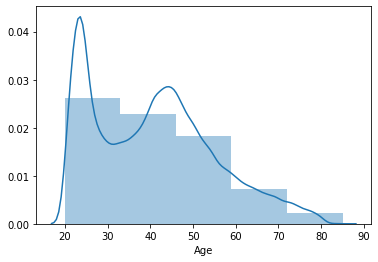

In [16]:
sns.distplot(train['Age'],5)

In [17]:
train.Region_Code.unique()

array([ 8., 28., 11., 41., 50., 29., 43., 18., 36., 17.,  7., 46., 12.,
       15., 31., 27.,  5., 51., 45., 33., 48., 39., 38., 30., 34., 24.,
        6., 47., 10., 23., 13., 35.,  4., 26., 21., 20., 25., 49.,  9.,
       22.,  0., 32.,  3., 14., 19., 40.,  1., 44., 37., 16.,  2., 42.,
       52.])

In [18]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,42,1,8.0,0,1-2 Year,Yes,31333.0,7.0,24
1,0,46,1,28.0,0,1-2 Year,Yes,28718.0,26.0,154
2,1,38,1,28.0,0,1-2 Year,Yes,23774.0,26.0,180
3,0,60,1,11.0,0,1-2 Year,Yes,35477.0,124.0,257
4,0,41,1,28.0,0,1-2 Year,Yes,52745.0,124.0,194


In [19]:
print(data.Previously_Insured.describe())
data.Previously_Insured.unique()

count    788406.000000
mean          0.296824
std           0.456859
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Previously_Insured, dtype: float64


array([0, 1], dtype=int64)

In [20]:
data.Vehicle_Age.unique()

array(['1-2 Year', '> 2 Years', '< 1 Year'], dtype=object)

In [21]:
data['Vehicle_Age']=data['Vehicle_Age'].map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})

In [22]:
data.Vehicle_Age.unique()

array([1, 2, 0], dtype=int64)

In [23]:
data.Policy_Sales_Channel.unique()

array([  7.,  26., 124., 152., 157., 160.,  55., 156.,  19.,   9.,  31.,
        52.,  13., 154., 163., 122.,   8.,  35.,  60.,  38.,   1.,  59.,
        25., 155.,  29., 125.,  23., 151.,   3., 136., 128.,  10.,  21.,
       153., 158.,  11.,  61.,   4.,  15., 145.,  16., 121., 138., 108.,
        64.,  36.,  12.,  54., 129.,  32., 109.,  30.,  65.,  56.,  86.,
       148.,  22., 120.,  24.,  98.,  42., 116., 139., 131., 159.,  17.,
        44.,  94.,  91., 113.,  37.,  14., 150.,  88., 135., 147.,  53.,
        20.,  51.,  81., 127., 111., 101., 103.,  87., 114., 133.,  78.,
        69.,  18.,  45., 107.,  93.,  47.,  68.,  66., 140., 104.,  90.,
       132.,  80.,  95.,  63.,  58., 119.,  40., 117.,  28., 106.,  96.,
        97.,  73.,  48., 118., 100.,  89.,  49., 110.,  70.,  82.,  39.,
        92., 115.,  67., 130.,  76.,  57.,  74.,  27.,  71., 102., 146.,
       137.,  46.,  62.,  34.,  99., 149.,  33.,  79., 123.,  84.,  43.,
       105.,   2., 134., 126.,  83., 112.,   6., 14

In [24]:
data.Vintage.unique()

array([ 24, 154, 180, 257, 194,  38, 206,  49, 108,  90, 233, 131, 200,
        74, 241,  16, 191,  42,  73,  54,  83, 254, 181,  87,  84, 189,
       259, 145,  76, 197, 231,  35, 192, 120, 129, 188,  34, 123, 173,
       184, 121,  33, 168, 218, 148, 222, 201, 135, 161,  47, 243, 249,
       144, 275,  12,  51, 170, 128,  57,  95, 253, 245,  75,  97, 292,
       244, 251, 248, 261,  55, 203, 220, 105,  92, 126, 294,  36, 276,
       178, 199, 146,  77, 287, 106, 167,  41,  61, 193,  99, 208, 250,
       185, 182, 165, 209, 177, 265, 137,  52, 139, 103, 298, 198, 138,
        68,  56, 174,  26,  29, 273,  50, 263, 296, 216, 224, 157, 228,
        78, 256,  94, 247, 136, 274, 252, 289, 288, 237, 239, 155, 229,
       232, 110, 226,  65, 186, 297, 160, 215, 230, 162, 223, 234, 202,
       116, 277,  80, 117,  60,  46, 282,  25, 195, 166, 280,  14, 143,
        22,  69, 172, 210, 127, 236, 101, 260, 272,  28, 124, 286,  48,
       134, 119,  85, 125, 217,  89, 115, 133, 196, 152,  10, 14

In [25]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,42,1,8.0,0,1,Yes,31333.0,7.0,24
1,0,46,1,28.0,0,1,Yes,28718.0,26.0,154
2,1,38,1,28.0,0,1,Yes,23774.0,26.0,180
3,0,60,1,11.0,0,1,Yes,35477.0,124.0,257
4,0,41,1,28.0,0,1,Yes,52745.0,124.0,194


In [26]:
data.Vehicle_Damage=data.Vehicle_Damage.map({"Yes":1,"No":0})

In [27]:
data.Vehicle_Damage.unique()

array([1, 0], dtype=int64)

In [62]:
cat_features=["Gender","Driving_License","Region_Code","Previously_Insured","Vehicle_Age","Vehicle_Damage","Policy_Sales_Channel"]

In [28]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,42,1,8.0,0,1,1,31333.0,7.0,24
1,0,46,1,28.0,0,1,1,28718.0,26.0,154
2,1,38,1,28.0,0,1,1,23774.0,26.0,180
3,0,60,1,11.0,0,1,1,35477.0,124.0,257
4,0,41,1,28.0,0,1,1,52745.0,124.0,194


In [29]:
data_checkpoint=data.copy()
data.shape

(788406, 10)

In [31]:
newdata=data.copy()

<h1>DATA CLEANING DONE</h1>

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [34]:
# scaler=StandardScaler()
scaler=MinMaxScaler()

In [109]:
x_train=newdata[:trainlen]
x_test=newdata[trainlen:]

In [110]:
# x_train.to_csv('train_clean.csv',index=False)
# x_test.to_csv('test_clean.csv',index=False)
# y_train.to_csv('y_train_clean.csv',index=False)

In [111]:
x_scaled_train=x_train.copy()
x_scaled_test=x_test.copy()

In [112]:
x_scaled_train[['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']]=scaler.fit_transform(x_train[['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']])
x_scaled_test[['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']]=scaler.transform(x_test[['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']])

In [113]:
x_scaled_train[:1]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,0.338462,1,0.153846,0,1,1,0.053397,0.037037,0.048443


In [114]:
x_scaled_test[:1]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
661369,0,0.076923,1,0.211538,1,0,0,0.061682,0.932099,0.148789


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=4,criterion='gini',n_estimators=500,warm_start=True,max_depth=6,min_samples_leaf=2,max_features='sqrt')
rfc.fit(x_scaled_train,y_train)
print(rfc.score(x_scaled_train,y_train))
y_pred=rfc.predict_proba(x_scaled_test)
y_pred

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
model = RandomForestClassifier(criterion='entropy', max_depth=1)
AdaBoost = AdaBoostClassifier(base_estimator=model, n_estimators=400, learning_rate=0.001)
AdaBoost.fit(x_scaled_train,y_train)
print(AdaBoost.score(x_scaled_train,y_train))
y_pred_ada=AdaBoost.predict(x_scaled_test)

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_scaled_train,y_train,early_stopping_rounds=5, 
             eval_set=[(x_scaled_train, y_train)], 
             verbose=False)
print(xgb.score(x_scaled_train,y_train))
y_pred_xg=xgb.predict(x_scaled_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_scaled_train,y_train)
print(reg.score(x_scaled_train,y_train))
y_pred_log=reg.predict(x_scaled_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_scaled_train, y_train)
print(gnb.score(x_scaled_train,y_train))
y_pred_naiv=gnb.predict(x_scaled_test)

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
X_t, X_tt, y_t, y_tt = train_test_split(x_train, y_train, test_size=.25, random_state=150303,stratify=y_train,shuffle=True)
catb = CatBoostClassifier()
catb= catb.fit(X_t, y_t,eval_set=(X_tt, y_tt),early_stopping_rounds=30,verbose=100)
y_pred_catb=catb.predict_proba(x_test)

In [185]:
from lightgbm import LGBMClassifier
lgb=LGBMClassifier(boosting_type='gbdt',num_leaves=41,n_estimators=500,max_depth=10,learning_rate=0.04,objective='binary',metric='auc',is_unbalance=True,
                 colsample_bytree=0.5,reg_lambda=2,reg_alpha=2,random_state=294,n_jobs=-1)

lgb.fit(x_train,y_train,categorical_feature=cat_features)
print(lgb.score(x_train,y_train))
y_pred_lgb=lgb.predict_proba(x_test)

C:\Users\Vishal Vanpariya\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


0.8116134865710367


In [186]:
y_pred_lgb

array([[0.99452249, 0.00547751],
       [0.19110837, 0.80889163],
       [0.24792381, 0.75207619],
       ...,
       [0.9989807 , 0.0010193 ],
       [0.99879048, 0.00120952],
       [0.99053628, 0.00946372]])

In [187]:
newpredlist=[]
for i in range(len(y_pred_lgb)):
    newpredlist.append(y_pred_lgb[i][1])   

In [188]:
submission.head()

,id,Response
0,381110,0.006777
1,381111,0.800036
2,381112,0.751348
3,381113,0.067062
4,381114,0.003040


In [189]:
submission['Response']=newpredlist
submission['Response'].describe()

count    127037.000000
mean          0.325639
std           0.339554
min           0.000180
25%           0.002305
50%           0.161297
75%           0.704884
max           0.925544
Name: Response, dtype: float64

In [190]:
submission['Response'].unique()

array([0.00547751, 0.80889163, 0.75207619, ..., 0.0010193 , 0.00120952,
       0.00946372])

In [191]:
submission.to_csv('submission.csv',index=False)